In [161]:
import pandas as pd
from dotenv import load_dotenv
import geopandas as gpd
import matplotlib.pyplot as plt

load_dotenv()

True

In [189]:
# map_data = gpd.read_file("file.geojson")
zip_map = gpd.read_file("fl_florida_zip_codes_geo.min.json")
zip_codes = pd.read_csv("zip_code_database.csv")
neighborhood_map = gpd.read_file("Miami_Neighborhoods_Shapefile (1).geojson")

In [190]:
zip_codes = zip_codes[["primary_city", "state", "county", "timezone", "area_codes", "country", "zip"]]
zip_codes["county, state"] = zip_codes["county"] + ", " + zip_codes["state"]
zip_map["ZCTA5CE10"] = zip_map["ZCTA5CE10"].astype(int)
zip_map["INTPTLON10"] = zip_map["INTPTLON10"].astype(float)
zip_map["INTPTLAT10"] = zip_map["INTPTLAT10"].astype(float)
zip_map = zip_map.merge(zip_codes, how="left", left_on="ZCTA5CE10", right_on="zip")
zip_map = zip_map.drop(columns=zip_map.columns[zip_map.nunique()==1], index=0)
zip_map = zip_map.dropna(axis=1)
zip_map = zip_map.drop(columns=["ZCTA5CE10"])
zip_map["zip"] = zip_map["zip"].astype(str)


In [192]:
zip_map = zip_map[zip_map["primary_city"]=="Miami"]
neighborhood_map = neighborhood_map.drop(columns=(["Shape__Length", "Shape__Area"]), axis=1)

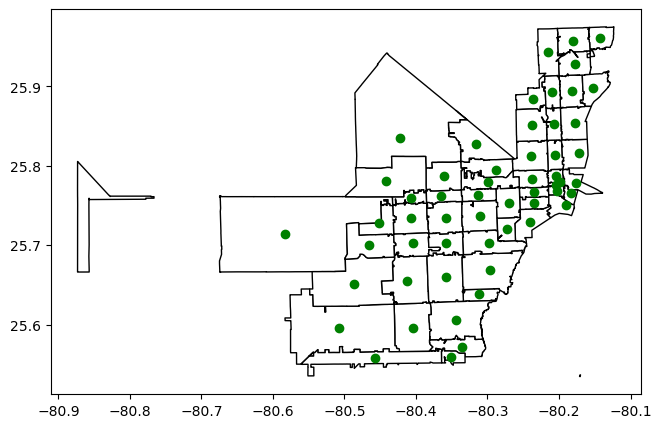

In [193]:
fig, ax = plt.subplots(figsize=(20,5))


zip_map.plot(ax=ax, color="white", edgecolor="black")
ax.scatter(zip_map["INTPTLON10"], zip_map["INTPTLAT10"], marker='o', color="green")